In [377]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce   
from sklearn.preprocessing import LabelEncoder

In [378]:
import warnings
warnings.filterwarnings('ignore')

train_dir='E:/data_prediction/Train.csv'
test_dir='E:/data_prediction/Test.csv'

df = pd.read_csv(train_dir)
df_test= pd.read_csv(test_dir)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
id                      26048 non-null int64
relationship_status     26048 non-null object
industry                26048 non-null object
genre                   26048 non-null object
targeted_sex            26048 non-null object
average_runtime         26048 non-null int64
airtime                 26048 non-null object
airlocation             26048 non-null object
ratings                 26048 non-null float64
expensive               26048 non-null object
money_back_guarantee    26048 non-null object
netgain                 26048 non-null bool
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


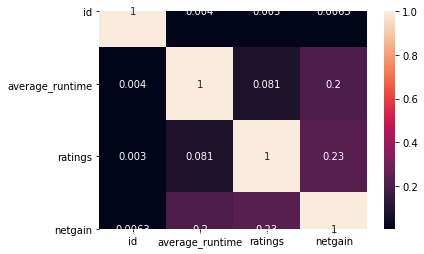

In [379]:
corr=df.corr()
sns.heatmap(corr,annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [380]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

###  DATA PREPOCESSING .....TAKING EACH COLUMN AT ONCE AND SIMULTANEOUSLY VISUALIZING

In [381]:
# REMOVING NON-REQUIERED FEATURES

train = df.drop( ['id'] ,axis=1)
test = df_test.drop( ['id'] ,axis=1)

train.head(7)

,relationship_status,industry,genre,targeted_sex,average_runtime,airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True
5,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,Yes,False
6,Married-civ-spouse,Pharma,Infomercial,Male,50,Morning,Outlying-US(Guam-USVI-etc),0.027465,High,No,False


##### column 5 average_runtime(minutes_per_week) 	

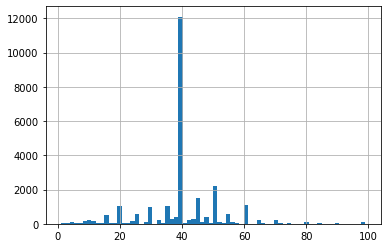

In [382]:
# CONVERTING EVERYHTING TO FLOAT
train['average_runtime']=train['average_runtime'].astype(float)
test['average_runtime']=test['average_runtime'].astype(float)

train['average_runtime'].hist(bins=70)

##### column 8 ratings

In [383]:
# counting ratings higher than 0.027464673 
# finding percent of samples having rating higher than 0.027464672

high_ratings_train=train['ratings'][train.ratings>0.027464673]
high_ratings_test=test['ratings'][test.ratings>0.027464673]

print(len(high_ratings_train))
print(len(high_ratings_test))

print(len(high_ratings_train)/len(train.ratings))
print(len(high_ratings_test)/len(test.ratings))


2242
565
0.08607186732186732
0.08674957776754184


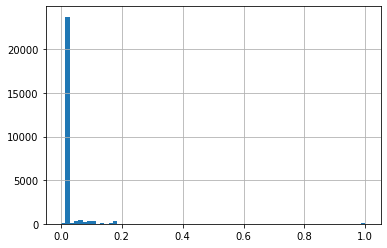

In [384]:
train['ratings'].hist(bins=70)

In [385]:
# BASED ON ABOVE ANALYSIS IT IS OK TO DROP RATINGS COLUMNS..
# CONSIDERING NETGAIN INDEPENDENT OF RATINGS

train.drop(['ratings'],axis=1,inplace=True)
test.drop(['ratings'],axis=1,inplace=True)

##### column 7 airlocation

In [386]:
# MOST FREQUENT IS USA

frequent_location_train=train['airlocation'][train.airlocation!='United-States']
frequent_location_test=test['airlocation'][test.airlocation!='United-States']

print(len(frequent_location_train)/len(train))
print(len(frequent_location_test)/len(test))

t=len(train.airlocation.unique())
print(t)

0.10741707616707617
0.10839858744050361
42


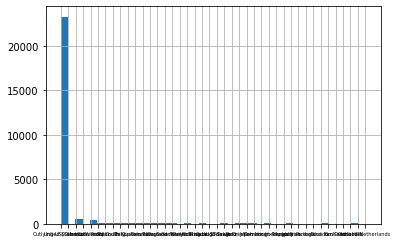

In [387]:
train['airlocation'].hist(bins=42,xlabelsize =5)

In [388]:
# FOR SAME REASON AS RATINGS DROPPING AIRLOCATION COLUMN

train.drop(['airlocation'],axis=1,inplace=True)
test.drop(['airlocation'],axis=1,inplace=True)

###### column 4 targeted_sex

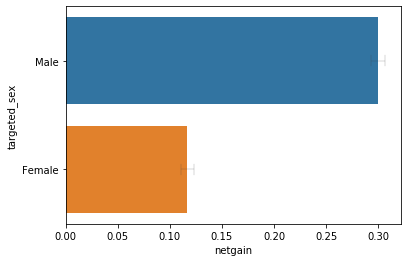

In [389]:
sns.barplot(x='netgain',y='targeted_sex',errwidth=0.2,capsize=0.1,dodge=True,data=train)

In [390]:
# creating dummy column and dropping female column

dummies_train_sex  = pd.get_dummies(train['targeted_sex'])
dummies_train_sex.drop(['Female'],axis=1,inplace=True)

dummies_test_sex  = pd.get_dummies(test['targeted_sex'])
dummies_test_sex.drop(['Female'],axis=1,inplace=True)

train = train.join(dummies_train_sex)
test = test.join(dummies_test_sex)

test.drop(['targeted_sex'],axis=1,inplace=True)
train.drop(['targeted_sex'],axis=1,inplace=True)

###### column name == expensive

In [391]:
# creating dummy column for expensive column

dummies_train_cost  = pd.get_dummies(train['expensive'])
dummies_train_cost.drop(['Medium'],axis=1,inplace=True)

dummies_test_cost  = pd.get_dummies(test['expensive'])
dummies_test_cost.drop(['Medium'],axis=1,inplace=True)

train = train.join(dummies_train_cost)
test = test.join(dummies_test_cost)

test.drop(['expensive'],axis=1,inplace=True)
train.drop(['expensive'],axis=1,inplace=True)


In [392]:
# creating dummy column for expensive column

dummies_train_cost  = pd.get_dummies(train['money_back_guarantee'])
dummies_train_cost.drop(['No'],axis=1,inplace=True)

dummies_test_cost  = pd.get_dummies(test['money_back_guarantee'])
dummies_test_cost.drop(['No'],axis=1,inplace=True)

train = train.join(dummies_train_cost)
test = test.join(dummies_test_cost)

test.drop(['money_back_guarantee'],axis=1,inplace=True)
train.drop(['money_back_guarantee'],axis=1,inplace=True)

In [393]:
# Target with default parameters
ce_target = ce.TargetEncoder(cols = ['relationship_status','industry','genre','airtime','netgain'],return_df=True,smoothing=10)

ce_target.fit(train, train['netgain'])
# Must pass the series for y in v1.2.8

Train=ce_target.transform(train, train['netgain'])

###  preprocessing done ....now data ready for training

In [394]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 10 columns):
relationship_status    26048 non-null float64
industry               26048 non-null float64
genre                  26048 non-null float64
average_runtime        26048 non-null float64
airtime                26048 non-null float64
netgain                26048 non-null float64
Male                   26048 non-null uint8
High                   26048 non-null uint8
Low                    26048 non-null uint8
Yes                    26048 non-null uint8
dtypes: float64(6), uint8(4)
memory usage: 1.3 MB


In [395]:
from sklearn.model_selection import train_test_split

X = Train.drop(['netgain'], axis = 1)
Y = Train['netgain']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 101)

In [396]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20838 entries, 14441 to 13151
Data columns (total 9 columns):
relationship_status    20838 non-null float64
industry               20838 non-null float64
genre                  20838 non-null float64
average_runtime        20838 non-null float64
airtime                20838 non-null float64
Male                   20838 non-null uint8
High                   20838 non-null uint8
Low                    20838 non-null uint8
Yes                    20838 non-null uint8
dtypes: float64(5), uint8(4)
memory usage: 1.0 MB


In [397]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [398]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

[[3689  302]
 [ 831  388]]
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      3991
         1.0       0.56      0.32      0.41      1219

    accuracy                           0.78      5210
   macro avg       0.69      0.62      0.64      5210
weighted avg       0.76      0.78      0.76      5210



In [399]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[3572  419]
 [ 778  441]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      3991
         1.0       0.51      0.36      0.42      1219

    accuracy                           0.77      5210
   macro avg       0.67      0.63      0.64      5210
weighted avg       0.75      0.77      0.76      5210



In [400]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

[[2527 1464]
 [ 173 1046]]
              precision    recall  f1-score   support

         0.0       0.94      0.63      0.76      3991
         1.0       0.42      0.86      0.56      1219

    accuracy                           0.69      5210
   macro avg       0.68      0.75      0.66      5210
weighted avg       0.81      0.69      0.71      5210



In [401]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))

[[3589  402]
 [ 717  502]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      3991
         1.0       0.56      0.41      0.47      1219

    accuracy                           0.79      5210
   macro avg       0.69      0.66      0.67      5210
weighted avg       0.77      0.79      0.77      5210



In [402]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
model = XGBClassifier()

# Train
model.fit(X_Train, Y_Train)

plt.figure(figsize = (50,55))
plt.show()

<Figure size 3600x3960 with 0 Axes>

In [403]:
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)

In [404]:
print(type(X_Train))
print(type(Y_Train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [407]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

#Y_Test = to_categorical(Y_Test)

input_dim = X_Train.shape[1]
nb_classes = Y_Train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(512, input_dim=input_dim))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

print("Training...")
model.fit(X_Train, Y_Train, nb_epoch=50, batch_size=16, validation_split=0.1, verbose=80)

preds = model.predict_classes(X_Test, verbose=0)

Training...
Train on 18754 samples, validate on 2084 samples
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [408]:
print(confusion_matrix(Y_Test,preds))
print(classification_report(Y_Test,preds))

[[3238  753]
 [ 432  787]]
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.85      3991
         1.0       0.51      0.65      0.57      1219

    accuracy                           0.77      5210
   macro avg       0.70      0.73      0.71      5210
weighted avg       0.80      0.77      0.78      5210

